In [1]:
# xmlrpc_client.ipynb

import xmlrpc.client
import pickle
import pandas as pd

server = xmlrpc.client.ServerProxy("http://localhost:7070")
stats_server = xmlrpc.client.ServerProxy("http://localhost:8018")
stats2_server = xmlrpc.client.ServerProxy("http://localhost:6060")

print ('Ping', server.ping())

print ('Server datetime', server.now())

print ('View, type, value:', server.type(2))

print ('View, type, value:', server.type(2.))

print ('View, type, value:', server.type('Best string'))

print ('View, type, value:', server.type([1,2,3]))

print ('View, type, value:', server.type(["one", "two", "three"]))

print( 'Sum 2 + 3 :', server.sum(2, 3))

print( 'Sum 2 ^ 3 :', server.pow(2, 3))


Ping True
Server datetime 20231212T15:14:44
View, type, value: ['2', "<class 'int'>", 2]
View, type, value: ['2.0', "<class 'float'>", 2.0]
View, type, value: ['Best string', "<class 'str'>", 'Best string']
View, type, value: ['[1, 2, 3]', "<class 'list'>", [1, 2, 3]]
View, type, value: ["['one', 'two', 'three']", "<class 'list'>", ['one', 'two', 'three']]
Sum 2 + 3 : 5
Sum 2 ^ 3 : 8


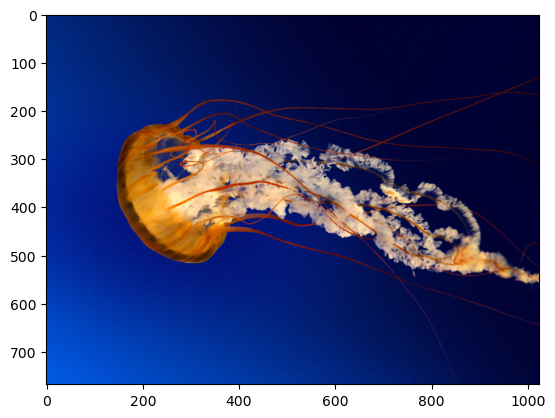

In [2]:
from PIL import Image # Работа с изображением
from pylab import * # Отображение
import xmlrpc.client

# Режим отображения внутри ноутбука
%matplotlib inline
# img = Image.open('11.bmp')
img = Image.open('Jellyfish.jpg')

img_arr = array(img)

# Исходное изображение
gray()
imshow(img_arr)

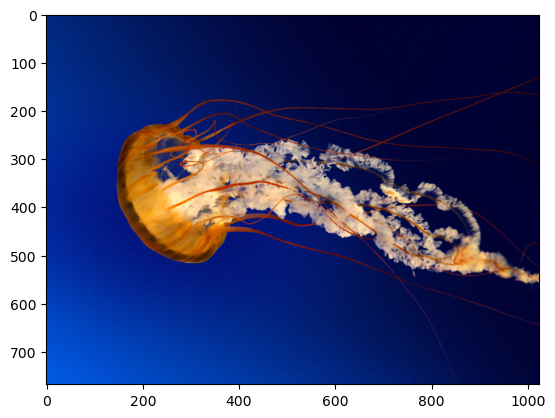

In [3]:
# Тест бинарной передачи данных
#pimg = img_arr.dumps()
pimg = pickle.dumps(img_arr) # универсально

img_bin = xmlrpc.client.Binary(pimg)

#img_bin2 = server.to_binary(img_bin)
img_bin2 = server.to_binary(img_bin)

#img_arr2 = np.loads(img_bin2.data)
img_arr2 = pickle.loads(img_bin2.data) # универсально

# Изображение после возрата с сервера
imshow(img_arr2)

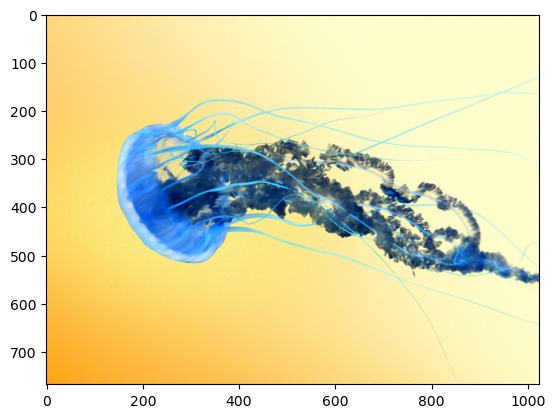

In [4]:

# Инверсия цвета изображения через сервер
def inv_color(img_arr_in):
    pimg = pickle.dumps(img_arr_in)
    img_bin = xmlrpc.client.Binary(pimg)
    
    #img_bin2 = server.inversion(img_bin)
    img_bin2 = server.inversion(img_bin)
    
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr_inv = inv_color(img_arr)

# Изображение с инверсией цвета
imshow(img_arr_inv)

In [5]:
print (server.in_black_list(u'Петров'))
print (server.in_black_list(u'Федоров'))
print( 'black_list_check:', server.in_black_list('Петров'))

black_list_check: Петров: bad_boy


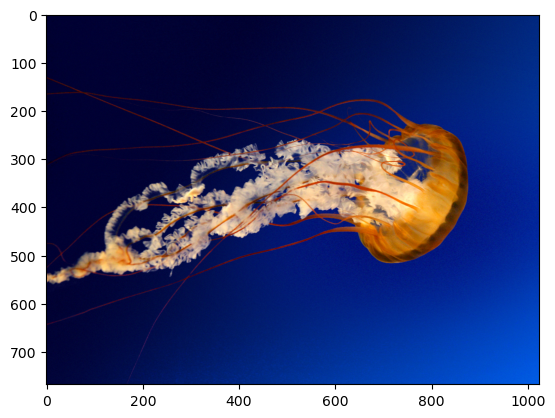

In [6]:
#Зеркальное отображение

pimg = pickle.dumps(img_arr)
img_bin = xmlrpc.client.Binary(pimg)
#mirr_img_bin = server.mirror(img_bin)
mirr_img_bin = server.mirror(img_bin)
img_arr = pickle.loads(mirr_img_bin.data)
imshow(img_arr)

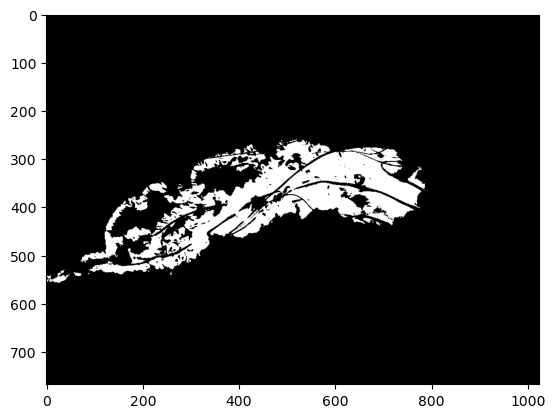

In [7]:
#Бинаризация изображения

pimg = pickle.dumps(img_arr)
img_bin = xmlrpc.client.Binary(pimg)
threshold = 100
binary_img_bin = server.picture_binarisation(img_bin, porog)
binary_img_bin = server.picture_binarisation(img_bin, threshold)
binary_img_bin = pickle.loads(binary_img_bin.data)

imshow(binary_img_bin)

In [8]:
try:
    print(stats_server.logs())
except ConnectionRefusedError:
     print('Сервер недоступен')

[['2023-11-20 19:05:37', 'Pow'], ['2023-11-20 19:05:44', 'Bin'], ['2023-11-20 19:05:49', 'Bin'], ['2023-11-20 19:05:53', 'Inversion'], ['2023-11-20 19:05:58', 'Flip'], ['2023-11-20 19:06:03', 'Badboys'], ['2023-11-20 19:06:08', 'Badboys']]


In [9]:
try:
    print(stats_server.logs_slice_by_operation('Type'))
except ConnectionRefusedError:
    print('Сервер недоступен')

[]


In [ ]:
try:
    print(stats2_server.get_all_logs())
except ConnectionRefusedError:
    print('Сервер недоступен')

In [11]:
try:
    print(stats2_server.get_logs('ping', '2023-12-05 12:02:09', '2023-12-05 19:02:21', 5))
except ConnectionRefusedError:
    print('Сервер недоступен')

[[22, 'ping', '20231205T17:36:35', 2.045940637588501], [24, 'ping', '20231205T17:37:57', 2.0294413566589355]]
